In [1]:
import mysql.connector 
from mysql.connector import errorcode
import config
import json
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
db_name = "Movies"

cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    password = config.passwd,
    database = db_name
)
cursor = cnx.cursor()
print(cnx)

In [3]:
cursor.execute("""SELECT original_title, revenue
FROM top_movies_info
WHERE vote_average>8 """)

df = pd.DataFrame(cursor.fetchall())
df.columns = [x[0] for x in cursor.description]
df

,original_title,revenue
0,Avengers: Infinity War,2046239637
1,Bohemian Rhapsody,894027543
2,Spider-Man: Into the Spider-Verse,375450417
3,Green Book,319700000
4,"Love, Simon",60848932
5,The Hate U Give,29163535
6,Won't You Be My Neighbor?,22835787


In [96]:
cursor.execute("""SELECT dvd_2018.name, 
dvd_2018.units_sold AS units_sold_18,
dvd_2019.name,
dvd_2019.units_sold AS units_sold_19
FROM dvd_2018
LEFT JOIN dvd_2019
ON dvd_2018.name = dvd_2019.name
UNION ALL
SELECT dvd_2018.name, 
dvd_2018.units_sold AS units_sold_18,
dvd_2019.name,
dvd_2019.units_sold AS units_sold_19
FROM dvd_2018
RIGHT JOIN dvd_2019
ON dvd_2018.name = dvd_2019.name""")
df = pd.DataFrame(cursor.fetchall())
#df.columns = [x[0] for x in cursor.description]
df

OperationalError: 2055: Lost connection to MySQL server at 'movie.cgmebsvbtfzd.us-east-2.rds.amazonaws.com:3306', system error: 32 Broken pipe

In [23]:
dvd_sales = df.fillna(0)
dvd_sales

,name,units_sold_18,name,units_sold_19
0,Venom,629261,Venom,361916
1,The Aristocats,370088,The Aristocats,328110
2,The Lion King,374910,The Lion King,324605
3,Mary Poppins,611573,Mary Poppins,319669
4,Frozen,481612,Frozen,301183
5,Justice League,1174890,Justice League,283327
6,Bedknobs and Broomsticks,286042,Bedknobs and Broomsticks,273343
7,Tangled,281970,Tangled,272883
8,Oliver & Company,238537,Oliver & Company,266904
9,The Equalizer 2,366372,The Equalizer 2,261940


In [24]:
dvd_sales['total_profit_dvd'] = pd.to_numeric(df['units_sold_18']) + pd.to_numeric(df['units_sold_19'])


In [19]:
dvd_sales


,name,units_sold_18,name,units_sold_19,total_profit_dvd
0,Venom,629261,Venom,361916,991177.0
1,The Aristocats,370088,The Aristocats,328110,698198.0
2,The Lion King,374910,The Lion King,324605,699515.0
3,Mary Poppins,611573,Mary Poppins,319669,931242.0
4,Frozen,481612,Frozen,301183,782795.0
5,Justice League,1174890,Justice League,283327,1458217.0
6,Bedknobs and Broomsticks,286042,Bedknobs and Broomsticks,273343,559385.0
7,Tangled,281970,Tangled,272883,554853.0
8,Oliver & Company,238537,Oliver & Company,266904,505441.0
9,The Equalizer 2,366372,The Equalizer 2,261940,628312.0


In [20]:
cursor.execute("""SELECT br_2018.name, br_2018.units_sold as br_sales_18, br_2019.units_sold as br_sales_19 FROM br_2018
JOIN br_2019
ON br_2018.name = br_2019.name""")
df_br = pd.DataFrame(cursor.fetchall())
df_br.columns = [x[0] for x in cursor.description]
br_sales = df_br
br_sales
br_sales['total_profit_br'] = df_br['br_sales_18'] + df_br['br_sales_19']
br_sales

,name,br_sales_18,br_sales_19,total_profit_br
0,Avengers: Infinity War,3146365,222931,3369296
1,Black Panther,2933621,88732,3022353
2,The Greatest Showman,2506545,309319,2815864
3,Deadpool 2,2273453,195077,2468530
4,Incredibles 2,2186297,170364,2356661
5,Jurassic World: Fallen Kingdom,1752244,187611,1939855
6,Solo: A Star Wars Story,1407788,109780,1517568
7,Ant-Man and the Wasp,1284366,142825,1427191
8,Venom,1137977,439662,1577639
9,Spider-Man: Homecoming,776378,277691,1054069


In [107]:
home_sales = pd.merge(dvd_sales, br_sales, on="name", how="inner")
home_sales["total_home_pofit"] = home_sales["total_profit_dvd"] + home_sales["total_profit_br"]
home_sales

,name,dvd_sales_18,dvd_sales_19,total_profit_dvd,br_sales_18,br_sales_19,total_profit_br,total_home_pofit
0,Venom,629261,361916,991177,1137977,439662,1577639,2568816
1,The Equalizer 2,366372,261940,628312,484246,175918,660164,1288476
2,Smallfoot,406241,251595,657836,363974,132446,496420,1154256
3,The Greatest Showman,1865146,238976,2104122,2506545,309319,2815864,4919986
4,Spider-Man: Homecoming,501265,236954,738219,776378,277691,1054069,1792288
5,Avengers: Infinity War,1159779,236417,1396196,3146365,222931,3369296,4765492
6,The House with a Clock in its Walls,265868,227836,493704,337909,198676,536585,1030289
7,Black Panther,1563543,169958,1733501,2933621,88732,3022353,4755854
8,Ant-Man and the Wasp,621826,166267,788093,1284366,142825,1427191,2215284
9,Jurassic World: Fallen Kingdom,1195316,161103,1356419,1752244,187611,1939855,3296274


In [78]:
cursor.close()
cnx.close()

In [101]:
cursor.execute("""SELECT name, Domestic_Box_Office
FROM top_movies_2018""")

df_boxoffice = pd.DataFrame(cursor.fetchall())
df_boxoffice.columns = [x[0] for x in cursor.description]
df_boxoffice

,name,Domestic_Box_Office
0,Black Panther,700059566
1,Avengers: Infinity War,678815482
2,Incredibles 2,608581744
3,Jurassic World: Fallen Kingdom,417719760
4,Aquaman,335061807
5,Deadpool 2,324591735
6,The Grinch,270620950
7,Mission: Impossible - Fallout,220159104
8,Ant-Man and the Wasp,216648740
9,Bohemian Rhapsody,216303339


In [84]:
cat_sales = pd.merge(home_sales, df_boxoffice, on="name", how="inner")
cat_sales

,name,dvd_sales_18,dvd_sales_19,total_profit_dvd,br_sales_18,br_sales_19,total_profit_br,total_home_pofit,Domestic_Box_Office
0,Venom,629261,361916.0,991177.0,1137977,439662.0,1577639.0,2568816.0,213511408
1,The Equalizer 2,366372,261940.0,628312.0,484246,175918.0,660164.0,1288476.0,102084362
2,Smallfoot,406241,251595.0,657836.0,363974,132446.0,496420.0,1154256.0,83240103
3,Avengers: Infinity War,1159779,236417.0,1396196.0,3146365,222931.0,3369296.0,4765492.0,678815482
4,Fifty Shades Freed,877331,183977.0,1061308.0,751464,NaN,NaN,NaN,100407760
5,Black Panther,1563543,169958.0,1733501.0,2933621,88732.0,3022353.0,4755854.0,700059566
6,Ant-Man and the Wasp,621826,166267.0,788093.0,1284366,142825.0,1427191.0,2215284.0,216648740
7,Jurassic World: Fallen Kingdom,1195316,161103.0,1356419.0,1752244,187611.0,1939855.0,3296274.0,417719760
8,Deadpool 2,1109879,NaN,NaN,2273453,195077.0,2468530.0,NaN,324591735
9,Incredibles 2,1092923,NaN,NaN,2186297,170364.0,2356661.0,NaN,608581744


In [56]:
cursor.execute("""SELECT top_movies_2018.name, top_movies_2018.Domestic_Box_Office, dvd_2019.units_sold
FROM top_movies_2018
JOIN dvd_2019
ON top_movies_2018.name = dvd_2019.name
ORDER BY units_sold""")
df_19 = pd.DataFrame(cursor.fetchall())
df_19.columns = [x[0] for x in cursor.description]
df_19

,name,Domestic_Box_Office,units_sold
0,First Man,44936545,159545
1,Jurassic World: Fallen Kingdom,417719760,161103
2,Ant-Man and the Wasp,216648740,166267
3,The Predator,51024708,166268
4,Green Book,85080171,166270
5,Black Panther,700059566,169958
6,Instant Family,67363237,171564
7,The Nutcracker and the Four Realms,54858851,178985
8,The Hate U Give,29719483,181433
9,Fifty Shades Freed,100407760,183977


In [132]:
cursor.execute("""SELECT top_movies_2018.name, top_movies_2018.Domestic_Box_Office, dvd_2018.units_sold
FROM top_movies_2018
JOIN dvd_2018
ON top_movies_2018.name = dvd_2018.name
ORDER BY dvd_2018.units_sold DESC""")
df_18 = pd.DataFrame(cursor.fetchall())
df_18.columns = [x[0] for x in cursor.description]
df_18

,name,Domestic_Box_Office,units_sold
0,I Can Only Imagine,83482352,904846
1,Fifty Shades Freed,100407760,877331
2,Solo: A Star Wars Story,213767512,694903
3,Venom,213511408,629261
4,Ant-Man and the Wasp,216648740,621826
5,Skyscraper,68420120,525680
6,Peter Rabbit,115234093,521268
7,Christopher Robin,99215042,425629
8,Smallfoot,83240103,406241
9,The Equalizer 2,102084362,366372


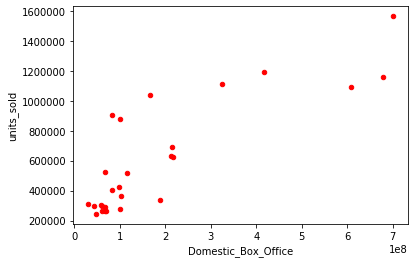

In [136]:
ax = df_18.plot.scatter(x='Domestic_Box_Office', y='units_sold', c='Red')



In [21]:
cursor.execute("""SELECT top_movies_info.original_title as name,
top_movies_info.budget,
top_movies_info.vote_average,
top_movies_info.revenue,
top_movies_info.release_date,
top_movies_info.runtime,
top_movies_2018.Domestic_Box_Office,
top_movies_2018.Opening_Weekend
FROM top_movies_info
JOIN top_movies_2018
ON top_movies_info.original_title = top_movies_2018.name""")
df_movies = pd.DataFrame(cursor.fetchall())
df_movies.columns = [x[0] for x in cursor.description]
df_movies

,name,budget,vote_average,revenue,release_date,runtime,Domestic_Box_Office,Opening_Weekend
0,Black Panther,200000000,7.4,1346739107,2018-02-13,134.0,700059566,202003951
1,Avengers: Infinity War,300000000,8.3,2046239637,2018-04-25,149.0,678815482,257698183
2,Incredibles 2,200000000,7.6,1241891456,2018-06-14,118.0,608581744,182687905
3,Jurassic World: Fallen Kingdom,170000000,6.5,1303459585,2018-06-06,129.0,417719760,148024610
4,Aquaman,160000000,6.8,1143689193,2018-12-07,144.0,335061807,67873522
5,Deadpool 2,110000000,7.5,741547413,2018-05-10,121.0,324591735,125507153
6,The Grinch,75000000,6.4,508575295,2018-11-08,90.0,270620950,67572855
7,Mission: Impossible - Fallout,178000000,7.3,791017452,2018-07-13,148.0,220159104,61236534
8,Ant-Man and the Wasp,140000000,7.0,622674139,2018-07-04,119.0,216648740,75812205
9,Bohemian Rhapsody,52000000,8.1,894027543,2018-10-24,135.0,216303339,51061119


In [46]:
cursor.execute("""SELECT dvd_2018.name, 
dvd_2018.units_sold AS dvds_sold, 
dvd_2018.consumer_spending AS dvd_rev, 
br_2018.consumer_spending AS br_rev
FROM dvd_2018
JOIN br_2018
USING(name)""")
df_dvd18 = pd.DataFrame(cursor.fetchall())
df_dvd18.columns = [x[0] for x in cursor.description]
df_dvd18

,name,dvds_sold,dvd_rev,br_rev
0,The Greatest Showman,1865146,22507136,44280824
1,Black Panther,1563543,26932109,64674588
2,Jurassic World: Fallen Kingdom,1195316,17177543,39994620
3,It,1184352,16281979,23496694
4,Avengers: Infinity War,1159779,20003698,72977031
5,Deadpool 2,1109879,15576758,44280552
6,Incredibles 2,1092923,18968914,45715777
7,Hotel Transylvania 3: Summer Vacation,1042029,17510309,18572811
8,Star Wars Ep. VIII: The Last Jedi,1014530,17734265,69429625
9,I Can Only Imagine,904846,12942311,9169832


In [50]:
dvd18_merge = pd.merge(df_movies, df_dvd18, on = "name", how="inner" )
#dvd18_merge = dvd18_merge.drop([15,16])

dvd18_merge['total_home_profit'] = dvd18_merge['dvd_rev'] +dvd18_merge['br_rev']
dvd18_merge

,name,budget,vote_average,revenue,release_date,runtime,Domestic_Box_Office,Opening_Weekend,dvds_sold,dvd_rev,br_rev,total_home_profit
0,Black Panther,200000000,7.4,1346739107,2018-02-13,134.0,700059566,202003951,1563543,26932109,64674588,91606697
1,Avengers: Infinity War,300000000,8.3,2046239637,2018-04-25,149.0,678815482,257698183,1159779,20003698,72977031,92980729
2,Incredibles 2,200000000,7.6,1241891456,2018-06-14,118.0,608581744,182687905,1092923,18968914,45715777,64684691
3,Jurassic World: Fallen Kingdom,170000000,6.5,1303459585,2018-06-06,129.0,417719760,148024610,1195316,17177543,39994620,57172163
4,Deadpool 2,110000000,7.5,741547413,2018-05-10,121.0,324591735,125507153,1109879,15576758,44280552,59857310
5,Ant-Man and the Wasp,140000000,7.0,622674139,2018-07-04,119.0,216648740,75812205,621826,13124952,26671639,39796591
6,Solo: A Star Wars Story,250000000,6.6,392952373,2018-05-15,135.0,213767512,84420489,694903,13420483,35649484,49069967
7,Venom,116000000,6.6,855013954,2018-09-28,112.0,213511408,80255756,629261,11476928,26003437,37480365
8,A Quiet Place,17000000,7.3,340677200,2018-04-03,91.0,188024361,50203562,338087,5779259,9276088,15055347
9,Hotel Transylvania 3: Summer Vacation,80000000,6.8,100176000,2018-06-28,97.0,167500092,44076225,1042029,17510309,18572811,36083120


In [81]:
#average percent of revenue coming from home profits
(dvd18_merge['total_home_profit']/dvd18_merge['revenue']).mean()

0.09143615452022968

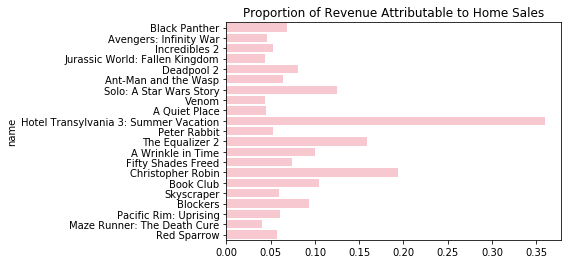

In [79]:
b = sns.barplot(y = dvd18_merge['name'],x = dvd18_merge['total_home_profit']/dvd18_merge['revenue'],color='pink').set_title('Proportion of Revenue Attributable to Home Sales')


Text(0.5, 1.0, 'Revenue')

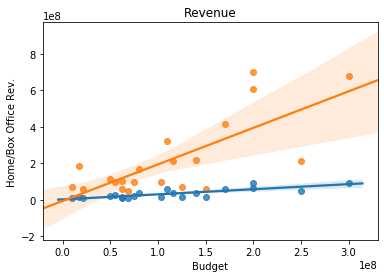

In [94]:
#transform(dvd18_merge, vote_average = as.numeric(vote_average))
#dvd18_merge['vote_average'] = dvd18_merge['vote_average'].astype(float)
#ax = dvd18_merge.plot.scatter(x='vote_average', y='units_sold', c='Red')
#ax = dvd18_merge.plot.scatter(x='vote_average', y='Domestic_Box_Office', c='Red')
#ax = dvd18_merge.plot.scatter(x='budget', y='units_sold', c='Red')
#ax = dvd18_merge.plot.scatter(x='budget', y='Domestic_Box_Office', c='Red')

ax = sns.regplot(dvd18_merge['budget'],dvd18_merge['total_home_profit'])
sns.regplot(dvd18_merge['budget'],dvd18_merge['Domestic_Box_Office'])
ax.set(xlabel = "Budget", ylabel = "Home/Box Office Rev.")
ax.set_title('Revenue')

[Text(0, 0.5, 'Home Revenue/Budget'), Text(0.5, 0, 'revenue')]

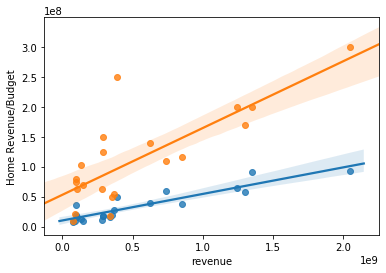

In [93]:
ax3 = sns.regplot(dvd18_merge['revenue'],dvd18_merge['total_home_profit'])
sns.regplot(dvd18_merge['revenue'],dvd18_merge['budget'])
ax3.set(xlabel = 'revenue', ylabel = 'Home Revenue/Budget')

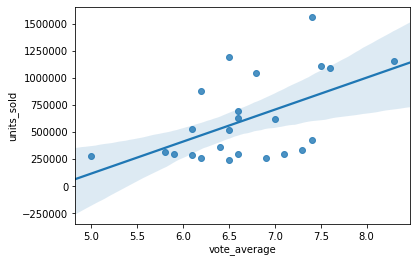

In [43]:
ax2 = sns.regplot(dvd18_merge['vote_average'].astype(float),dvd18_merge['units_sold'])

In [112]:
cursor.execute("""SELECT name, units_sold FROM dvd_2019""")
df_dvd19 = pd.DataFrame(cursor.fetchall())
df_dvd19.columns = [x[0] for x in cursor.description]
df_dvd19
dvd19_merge = pd.merge(df_movies, df_dvd19, on = "name", how="inner" )
dvd19_merge = dvd19_merge.drop([])

,name,budget,vote_average,revenue,release_date,Domestic_Box_Office,Opening_Weekend,units_sold
0,Black Panther,200000000,7.4,1346739107,2018-02-13,700059566,202003951,169958
1,Avengers: Infinity War,300000000,8.3,2046239637,2018-04-25,678815482,257698183,236417
2,Jurassic World: Fallen Kingdom,170000000,6.5,1303459585,2018-06-06,417719760,148024610,161103
3,Aquaman,160000000,6.8,1143689193,2018-12-07,335061807,67873522,842834
4,Ant-Man and the Wasp,140000000,7.0,622674139,2018-07-04,216648740,75812205,166267
5,Bohemian Rhapsody,52000000,8.1,894027543,2018-10-24,216303339,51061119,793275
6,Venom,116000000,6.6,855013954,2018-09-28,213511408,80255756,361916
7,Mary Poppins Returns,130000000,6.6,348807090,2018-12-13,171958438,23523121,316268
8,Fantastic Beasts: The Crimes of Grindelwald,200000000,6.9,653355901,2018-11-14,159555901,62163104,536816
9,Halloween,10000000,7.5,0,1978-10-24,159342015,76221545,312072
